In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.font_manager as fm
import os
import re
import scipy.stats as sp
from scipy.stats import sem, t
from scipy import mean

fpath = '/Library/Fonts/Myriad-Pro_31655.ttf'
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]
axis_font = {'fontname':fname, 'fontproperties':prop}

# Part 1: Load in data

In [2]:
in_dir = 'data/'
nuspeak = pd.read_excel(in_dir + '4g_nuspeak_experimental_data.xlsx', sheet = 'for_plotting')
nuspeak = nuspeak.sort_values(by = 'type')
nuspeak
nuspeak.to_csv('cleaned_csvs/4g_nuspeak.csv')

In [3]:
storm = pd.read_excel(in_dir + '4h_storm_experimental_data.xlsx', sheet = 'for_plotting')
storm = storm.sort_values(by = 'type')
storm
storm.to_csv('cleaned_csvs/4h_storm.csv')

In [4]:
def get_means_and_bounds_of_stds(matrix):
    
    means = []
    errors = []

    x = ['bad', 'good', 'optimized']
    
    for group in matrix.groupby('type'):
        group = group[1]
        group = pd.DataFrame(group)
        group = group.loc[:,'Experimental fold change']
        m = mean(group)
        std_err = sem(group)
        means.append(m)
        errors.append(std_err)
        
    return([means, errors])

# Part 2: Make plots

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


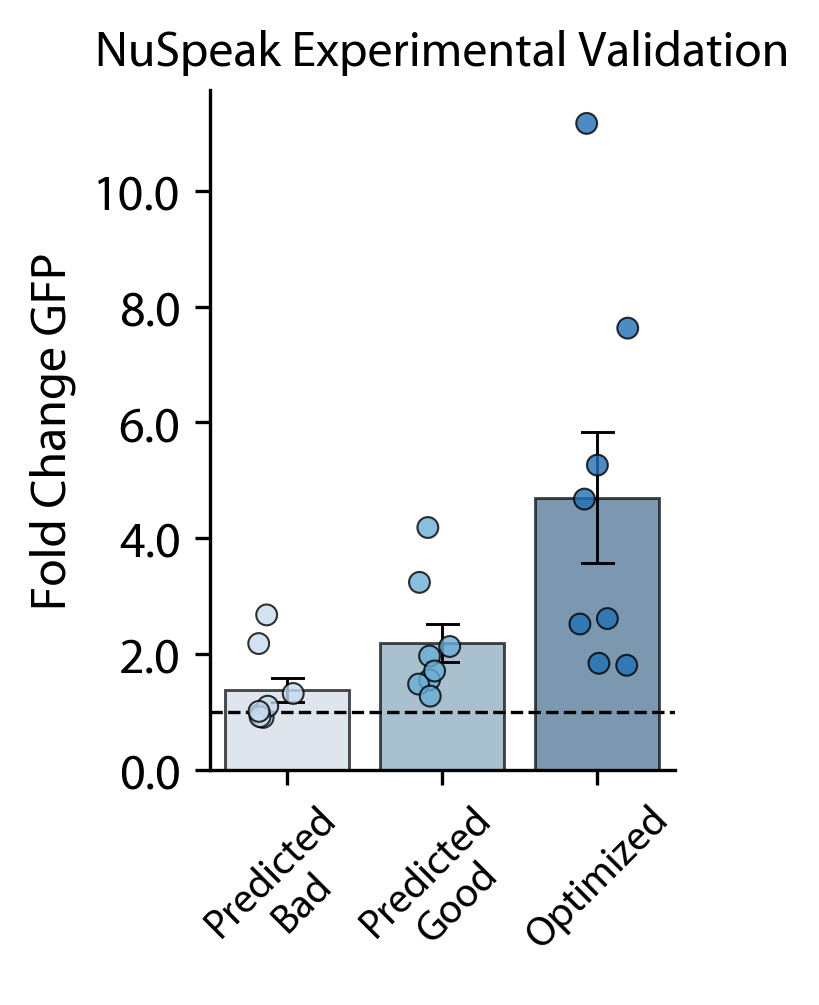

In [5]:
blue = '#407DCF'
grey = 'lightgray'
width = 0.25

fig, ax = plt.subplots(figsize = (2,3), dpi = 300)

g = sns.stripplot(nuspeak['type'], nuspeak['Experimental fold change'], size = 5,alpha = 0.8,
                  linewidth = 0.5, edgecolor = 'black', jitter = 0.2, palette ="Blues")
sns.barplot(nuspeak['type'], nuspeak['Experimental fold change'], ci = 68, edgecolor = 'black', 
            capsize=.2, color = 'black', alpha = 0.7, linewidth = 0.7, palette="Blues",
           errwidth = 0.7, saturation = 0.5, errcolor = 'black')

ax.axhline(1, ls='--', color = 'black', linewidth = 0.8)

g.set_xticklabels(['Predicted\nBad', 'Predicted\nGood', 'Optimized'], **axis_font, rotation = 45, fontsize = 10)
g.set_xlabel('')

g.set_yticklabels(g.get_yticks(), rotation = 0, **axis_font, fontsize = 12)
g.set_ylabel('Fold Change GFP', **axis_font, fontsize = 12)

g.set_title('NuSpeak Experimental Validation', **axis_font, fontsize = 12)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('../../illustrator_files/fig4/fig4_individuals/4d_nuspeak.svg')
plt.show()

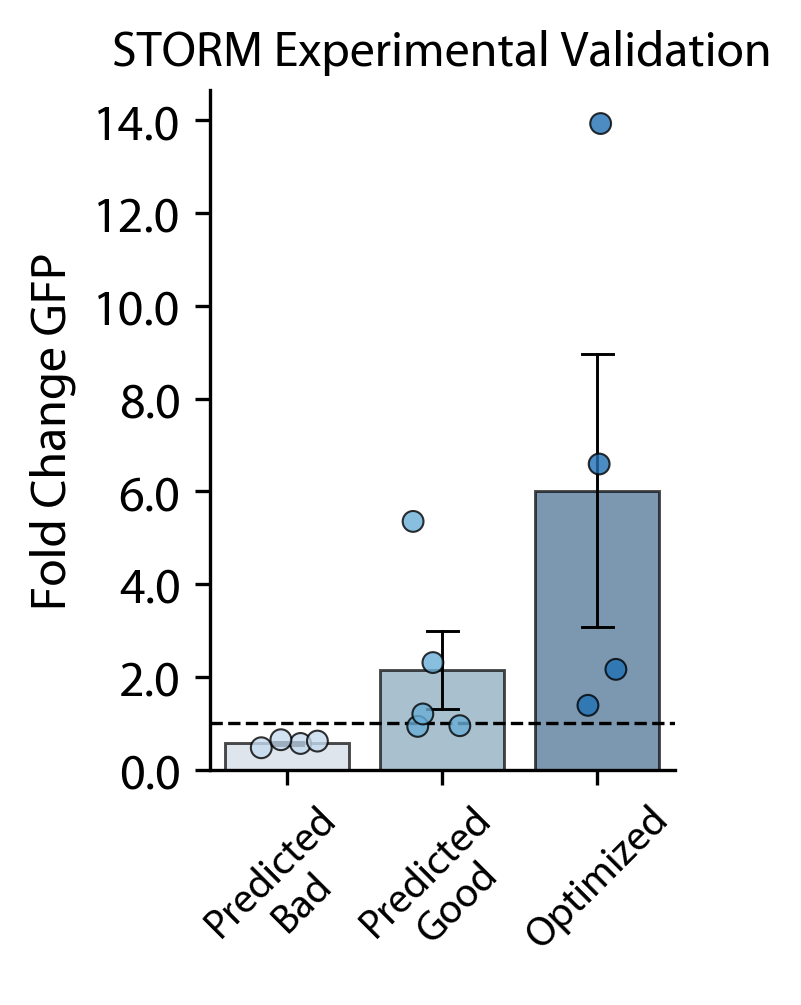

In [6]:
width = 0.25

fig, ax = plt.subplots(figsize = (2,3), dpi = 300)

g = sns.stripplot(storm['type'], storm['Experimental fold change'], size = 5,alpha = 0.8,
                  linewidth = 0.5, edgecolor = 'black', jitter = 0.2, palette ="Blues")
sns.barplot(storm['type'], storm['Experimental fold change'], ci = 68, edgecolor = 'black', 
            capsize=.2, color = 'black', alpha = 0.7, linewidth = 0.7, palette="Blues",
           errwidth = 0.7, saturation = 0.5, errcolor = 'black')

ax.axhline(1, ls='--', color = 'black', linewidth = 0.8)

g.set_xticklabels(['Predicted\nBad', 'Predicted\nGood', 'Optimized'], **axis_font, rotation = 45, fontsize = 10)
g.set_xlabel('')

g.set_yticklabels(g.get_yticks(), rotation = 0, **axis_font, fontsize = 12)
g.set_ylabel('Fold Change GFP', **axis_font, fontsize = 12)

g.set_title('STORM Experimental Validation', **axis_font, fontsize = 12)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('../../illustrator_files/fig4/fig4_individuals/4d_storm.svg')
plt.show()

In [7]:
# do some stats- one tailed mann-whitney U

nuspeak_pred_bad = nuspeak.loc[nuspeak['type'] == 'bad', 'Experimental fold change']
nuspeak_pred_good = nuspeak.loc[nuspeak['type'] == 'good', 'Experimental fold change']
nuspeak_optim = nuspeak.loc[nuspeak['type'] == 'optimized', 'Experimental fold change']

print(sp.stats.mannwhitneyu(nuspeak_pred_bad, nuspeak_pred_good))
print(sp.stats.mannwhitneyu(nuspeak_pred_good, nuspeak_optim))
print(sp.stats.mannwhitneyu(nuspeak_pred_bad, nuspeak_optim))

MannwhitneyuResult(statistic=13.0, pvalue=0.02601480881111259)
MannwhitneyuResult(statistic=12.0, pvalue=0.020284427897891328)
MannwhitneyuResult(statistic=6.0, pvalue=0.003702766670250134)


In [8]:
# do some stats- one tailed mann-whitney U

storm_pred_bad = storm.loc[storm['type'] == 'bad', 'Experimental fold change']
storm_pred_good = storm.loc[storm['type'] == 'good', 'Experimental fold change']
storm_optim = storm.loc[storm['type'] == 'optimized', 'Experimental fold change']

print(sp.stats.mannwhitneyu(storm_pred_bad, storm_pred_good))
print(sp.stats.mannwhitneyu(storm_pred_good, storm_optim))
print(sp.stats.mannwhitneyu(storm_pred_bad, storm_optim))

MannwhitneyuResult(statistic=0.0, pvalue=0.009982226652608022)
MannwhitneyuResult(statistic=4.0, pvalue=0.08895479749349122)
MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)
